In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Diabetes_prediction.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [5]:
# Check for missing or zero values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Diagnosis,0


In [6]:
# Scale numeric features
scaler = StandardScaler()
features = df.drop('Diagnosis', axis=1)
features_scaled = scaler.fit_transform(features)

Text(0, 0.5, 'count')

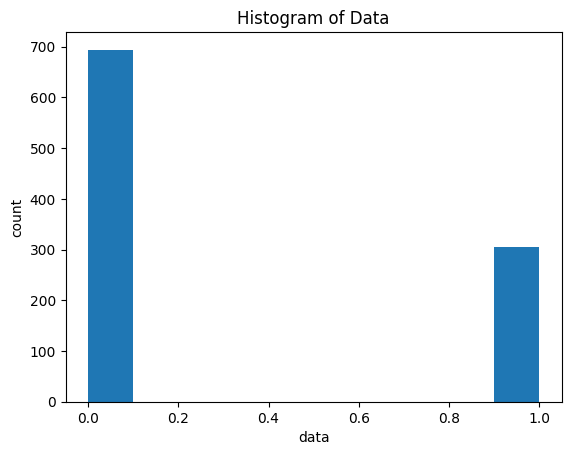

In [10]:
plt.hist(df["Diagnosis"])
plt.title('Histogram of Data')
plt.xlabel('data')
plt.ylabel('count')

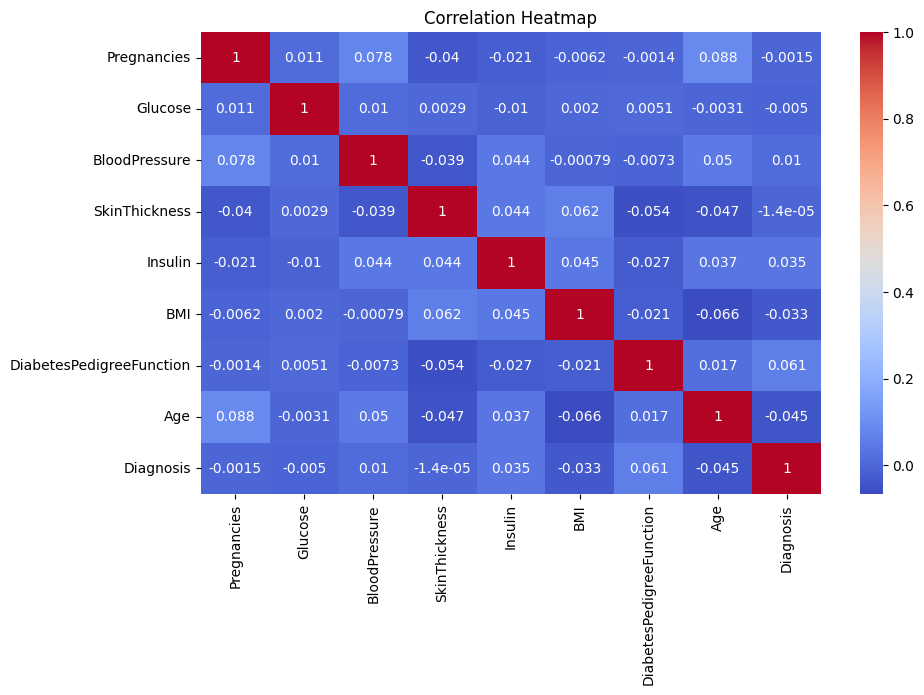

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

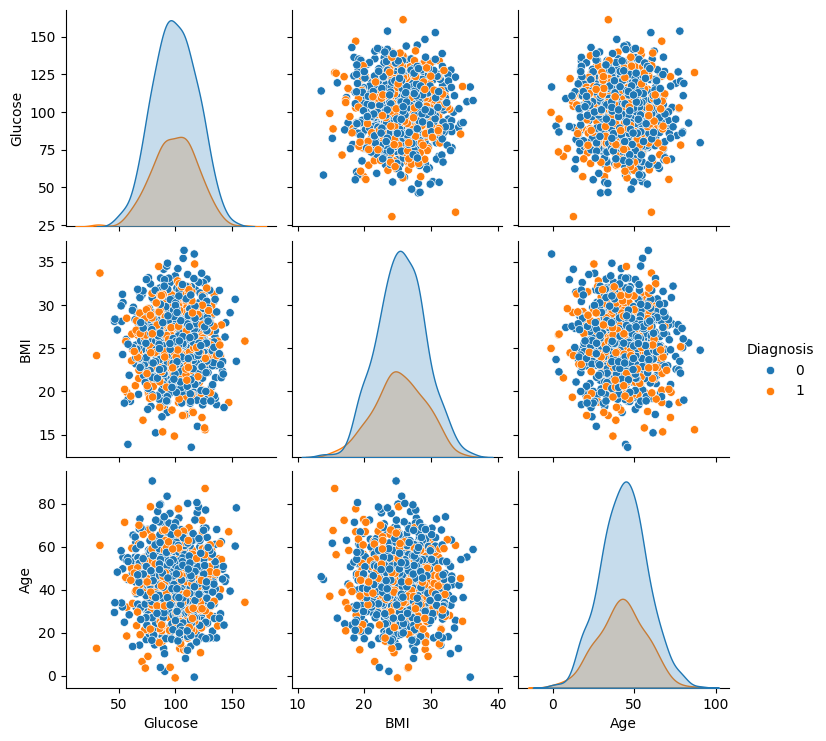

In [13]:
# Pairplot for selected features
sns.pairplot(df, vars=['Glucose', 'BMI', 'Age'], hue='Diagnosis', diag_kind='kde')
plt.show()

In [15]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['Diagnosis'], test_size=0.3, random_state=42)


## **Model Training and Evaluation**
## **Logistic Regression**

In [19]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       208
           1       0.00      0.00      0.00        92

    accuracy                           0.69       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.48      0.69      0.57       300



## **Random Forest Regression**



In [20]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

Random Forest Results
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       208
           1       0.06      0.01      0.02        92

    accuracy                           0.64       300
   macro avg       0.37      0.47      0.40       300
weighted avg       0.49      0.64      0.55       300



In [21]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Results")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Results
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       208
           1       0.26      0.11      0.15        92

    accuracy                           0.63       300
   macro avg       0.47      0.48      0.46       300
weighted avg       0.55      0.63      0.58       300



                 Model  Accuracy
0  Logistic Regression  0.693333
1        Random Forest  0.643333
2    Gradient Boosting  0.630000


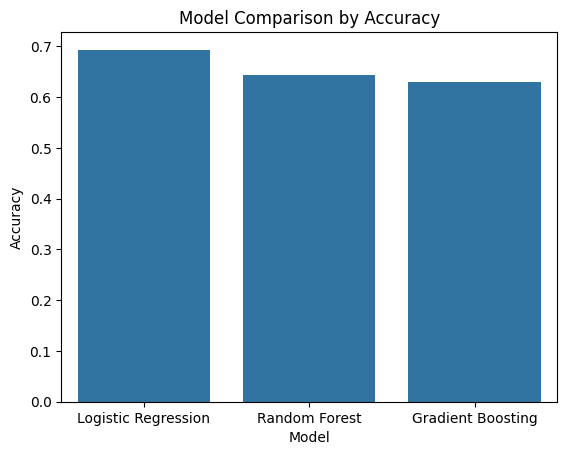

In [22]:
# Calculate Accuracy, Precision, Recall, and F1-score
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb)]

# Create a dataframe to display results
results_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy})
print(results_df)

# Visualize model comparison
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison by Accuracy')
plt.show()


## **Hyperparamter Tuning**

## **Logistic Regression**

In [24]:
# Define the parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
    'max_iter': [100, 200, 500]  # Maximum iterations
}

# Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# RandomizedSearchCV for Logistic Regression
lr_random_search = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=lr_param_grid,
    n_iter=10,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=5,  # Cross-validation folds
    random_state=42
)

# Fit the model
lr_random_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Logistic Regression:", lr_random_search.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", lr_random_search.best_score_)

# Test set evaluation
lr_best_model = lr_random_search.best_estimator_
y_pred_lr_tuned = lr_best_model.predict(X_test)
print("Tuned Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))

Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'max_iter': 100, 'C': 0.1}
Best Cross-Validation Accuracy for Logistic Regression: 0.6928571428571428
Tuned Logistic Regression Test Accuracy: 0.6933333333333334


## **Random Forest Tuning**

In [25]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42
)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Random Forest:", rf_random_search.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", rf_random_search.best_score_)

# Test set evaluation
rf_best_model = rf_random_search.best_estimator_
y_pred_rf_tuned = rf_best_model.predict(X_test)
print("Tuned Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))


Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best Cross-Validation Accuracy for Random Forest: 0.6814285714285715
Tuned Random Forest Test Accuracy: 0.6766666666666666


In [26]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42
)

# Fit the model
gb_random_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Gradient Boosting:", gb_random_search.best_params_)
print("Best Cross-Validation Accuracy for Gradient Boosting:", gb_random_search.best_score_)

# Test set evaluation
gb_best_model = gb_random_search.best_estimator_
y_pred_gb_tuned = gb_best_model.predict(X_test)
print("Tuned Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_pred_gb_tuned))

Best Parameters for Gradient Boosting: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.01}
Best Cross-Validation Accuracy for Gradient Boosting: 0.6942857142857143
Tuned Gradient Boosting Test Accuracy: 0.6933333333333334


## **Comparative Results After Hyperparameter Tuning**

In [29]:
# Calculate the accuracy of the tuned models
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy_tuned = [
    accuracy_score(y_test, y_pred_lr_tuned),
    accuracy_score(y_test, y_pred_rf_tuned),
    accuracy_score(y_test, y_pred_gb_tuned)
]

# Create a DataFrame to summarize results
results_tuned_df = pd.DataFrame({'Model': models, 'Accuracy (Tuned)': accuracy_tuned})
results_tuned_df

,Model,Accuracy (Tuned)
0,Logistic Regression,0.693333
1,Random Forest,0.676667
2,Gradient Boosting,0.693333


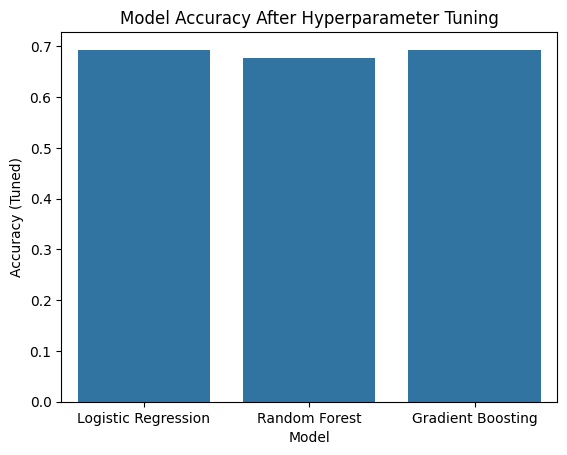

In [28]:
# Visualization
sns.barplot(x='Model', y='Accuracy (Tuned)', data=results_tuned_df)
plt.title('Model Accuracy After Hyperparameter Tuning')
plt.show()